In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

C:\Software\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
X_train_1000,y_train_1000=X_train[:1000],y_train[:1000]

In [7]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train_1000, y_train_1000, cv=3, scoring="accuracy")

array([0.84821429, 0.87087087, 0.83987915])

In [8]:
from sklearn.model_selection import cross_val_predict 
preidct_1000=cross_val_predict(knn_clf, X_train_1000, y_train_1000, cv=3)

### grid serch

In [9]:
from sklearn.model_selection import GridSearchCV 
param_grid = [ {'n_neighbors': [2,3, 5, 10,20],
                'weights': ["uniform", "distance" ],
               "p":[1,2,3]}, 
             ] 
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_1000, y_train_1000)

C:\Software\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [2, 3, 5, 10, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [10]:
grid_search.best_params_

{'n_neighbors': 5, 'p': 3, 'weights': 'distance'}

In [11]:
grid_search.cv_results_["mean_test_score"]

array([0.84 , 0.855, 0.846, 0.864, 0.851, 0.865, 0.843, 0.854, 0.856,
       0.859, 0.856, 0.857, 0.833, 0.841, 0.853, 0.864, 0.861, 0.866,
       0.825, 0.827, 0.839, 0.85 , 0.842, 0.852, 0.786, 0.795, 0.806,
       0.815, 0.813, 0.82 ])

In [12]:
grid_search.best_score_

0.866

In [13]:
X_train_1000,y_train_1000=X_train[:5000],y_train[:5000]

In [14]:
cross_val_score(grid_search.best_estimator_, X_train_1000, y_train_1000, cv=3, scoring="accuracy")

array([0.92215569, 0.93581284, 0.93144919])

In [15]:
best_fnn=grid_search.best_estimator_

In [16]:
best_fnn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=3,
           weights='distance')

In [17]:
predict_test=best_fnn.predict(X_test[:1000])

In [18]:
predict_test

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0',
       '7', '4', '0', '1', '3', '1', '3', '0', '7', '2', '7', '1', '2',
       '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4', '6', '3',
       '5', '5', '6', '0', '4', '1', '9', '5', '7', '8', '9', '3', '7',
       '4', '6', '4', '3', '0', '7', '0', '2', '9', '1', '7', '3', '2',
       '9', '7', '7', '6', '2', '7', '8', '4', '7', '3', '6', '1', '3',
       '6', '9', '3', '1', '4', '1', '7', '6', '9', '6', '0', '5', '4',
       '9', '9', '2', '1', '9', '4', '8', '7', '3', '9', '7', '9', '4',
       '4', '9', '2', '5', '4', '7', '6', '7', '9', '0', '5', '8', '5',
       '6', '6', '5', '7', '8', '1', '0', '1', '6', '4', '6', '7', '3',
       '1', '7', '1', '8', '2', '0', '2', '9', '9', '5', '5', '1', '5',
       '6', '0', '3', '4', '4', '6', '5', '4', '6', '5', '4', '5', '1',
       '4', '4', '7', '2', '3', '2', '7', '1', '8', '1', '8', '1

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:1000], predict_test)

0.969

In [21]:
from sklearn.metrics import confusion_matrix
con_mx=confusion_matrix(y_test[:1000], predict_test)
con_mx

array([[ 85,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 126,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 110,   0,   0,   0,   1,   4,   1,   0],
       [  0,   0,   0, 102,   0,   3,   0,   2,   0,   0],
       [  1,   1,   0,   0, 104,   0,   1,   0,   0,   3],
       [  0,   0,   0,   0,   1,  85,   0,   0,   0,   1],
       [  1,   0,   0,   0,   1,   0,  85,   0,   0,   0],
       [  0,   1,   0,   0,   1,   0,   0,  97,   0,   0],
       [  1,   1,   0,   3,   0,   0,   0,   0,  83,   1],
       [  0,   0,   0,   0,   0,   0,   0,   1,   1,  92]], dtype=int64)

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

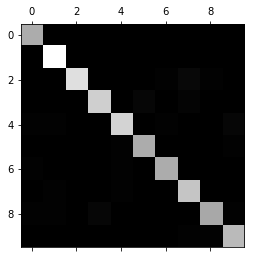

In [24]:
plt.matshow(con_mx, cmap=plt.cm.gray)
plt.show()

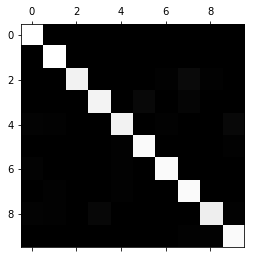

In [30]:
plt.matshow(con_mx/con_mx.sum(axis=1), cmap=plt.cm.gray)
plt.show()